In [1]:
import numpy as np
import matplotlib.pyplot as plt

from constants import FIGSIZE

In [2]:
def comma_string_to_float(input: str) -> float:
    """
    Converter function that parses numerical strings with comma decimal separators into floats.
    """
    return float(input.replace(',', '.'))

# Fibre spectrometer data ([nm], [a.u.])
wavelength_arr, intensity_arr = np.loadtxt(
    fname='data/Faserspektrometer/offener_HeNe.txt',
    delimiter='\t',
    skiprows=17,
    max_rows=2048,
    unpack=True,
    encoding='iso-8859-1',
    converters={
        0: comma_string_to_float,
        1: comma_string_to_float
    }
)

# Normalize the intensity array
intensity_arr /= intensity_arr.max()

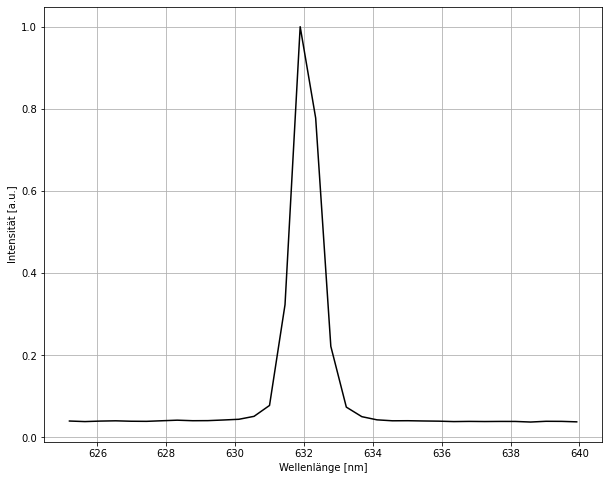

In [3]:
# Define plotting interval [nm]
lambda_min = 625
lambda_max = 640

# Create array of indeces of the array elements in the interval
plotting_inds = np.argwhere(np.logical_and(
    np.less_equal(lambda_min, wavelength_arr),
    np.less_equal(wavelength_arr, lambda_max)
))


# Create plot
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.set_xlabel('Wellenlänge [nm]')
ax.set_ylabel('Intensität [a.u.]')
ax.grid()

# Plot the spectrum
ax.plot(wavelength_arr[plotting_inds], intensity_arr[plotting_inds], 'k')

In [4]:
fig.savefig('figs/aufgabe3d.svg', bbox_inches='tight')